### **Preprocessing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe(include='all') # to see even categorical data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Survived'])  # Remove the 'Survived' column from features
y = df['Survived']  # 'Survived' is now the target variable

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine features and target for training and testing (optional)
train_data = pd.concat([X_train, y_train], axis=1)  # 'Survived' will be present in train_data
test_data = pd.concat([X_test, y_test], axis=1)  # Same for test_data

# Now 'Survived' should be part of the train_data and test_data
print(train_data.columns)  # Verify 'Survived' is present
print(test_data.columns)   # Verify 'Survived' is present


# Check for null values
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_data.isnull().sum()))

# Check for duplicated rows
print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))
print('Duplicated values in test {}'.format(test_data.duplicated().sum()))


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

Null Values in Training 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
Survived         0
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             37
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
Survived         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


Mean age of Miss. title 22.0
Mean age of Mrs. title 35.0
Mean age of Mr. title 33.0
Mean age of Master. title 4.0


<ipython-input-4-744dc77a099d>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = name_age[0]  # Extract the name
<ipython-input-4-744dc77a099d>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = name_age[1]   # Extract the age
<ipython-input-4-744dc77a099d>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = name_age[0]  # Extract the name
<ipython-input-4-744dc77a099d>:16: FutureWarning: Series.__getitem__ treating

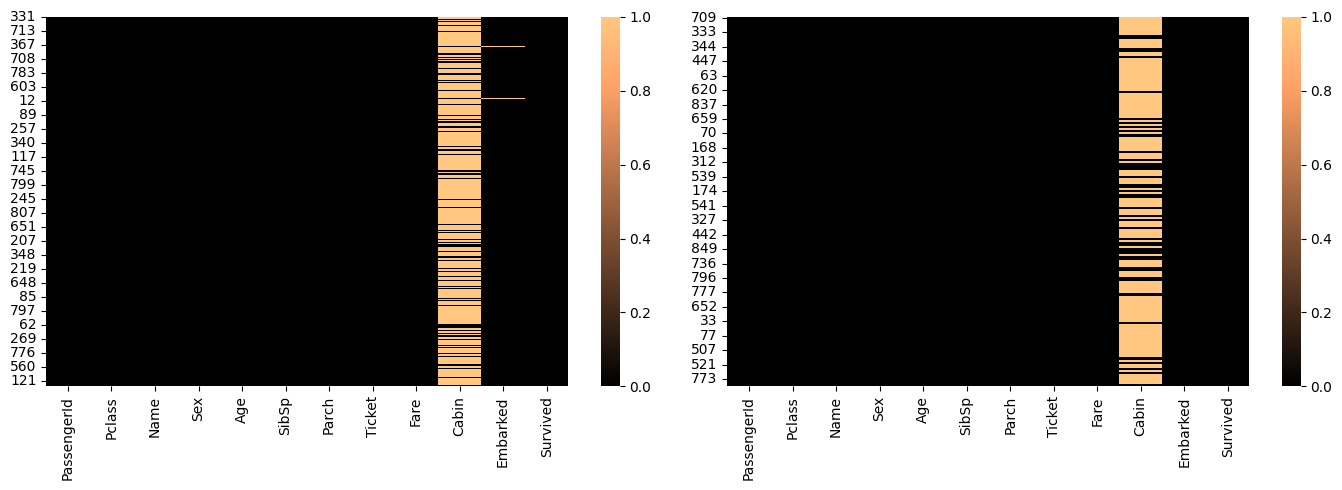

In [4]:
# Calculate the mean age for passengers based on their titles, rounding to the nearest integer
mean_age_miss = train_data[train_data["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()  # Mean age for "Miss."
mean_age_mrs = train_data[train_data["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()    # Mean age for "Mrs."
mean_age_mr = train_data[train_data["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()      # Mean age for "Mr."
mean_age_master = train_data[train_data["Name"].str.contains('Master.', na=False)]['Age'].mean().round()  # Mean age for "Master."

# Print calculated mean ages for each title group
print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

# Function to fill missing ages based on the title in the passenger's name
def fill_age(name_age):
    name = name_age[0]  # Extract the name
    age = name_age[1]   # Extract the age

    # Assign mean age based on title if age is missing
    if pd.isnull(age):  # Check if age is missing
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:  # Assign 'Dr.' the same mean age as 'Master.'
            return mean_age_master
        if 'Ms.' in name:  # Assign 'Ms.' the same mean age as 'Miss.'
            return mean_age_miss
    else:
        return age  # Return the original age if not missing

# Apply the fill_age function to fill missing ages in training and test datasets
train_data['Age'] = train_data[['Name', 'Age']].apply(fill_age, axis=1)  # Process training data
test_data['Age'] = test_data[['Name', 'Age']].apply(fill_age, axis=1)    # Process testing data

# Create a heatmap to visualize missing values in the dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Set up subplots for comparison
sns.heatmap(train_data.isnull(), cmap='copper', ax=ax1)  # Heatmap for training data missing values
sns.heatmap(test_data.isnull(), cmap='copper', ax=ax2)   # Heatmap for testing data missing values
plt.tight_layout()  # Adjust layout for better spacing between plots

A significant portion of the data in the Cabin column is missing. To address this, we could simplify the data by extracting only the first letter of the cabin identifier and filling the missing values with a placeholder, such as X. This approach provides a consistent and manageable format while retaining some meaningful information.

<ipython-input-5-06a6ae379fa8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cabin', y='Fare', data=train_data, palette='Set2')  # Boxplot showing fare distribution grouped by cabin


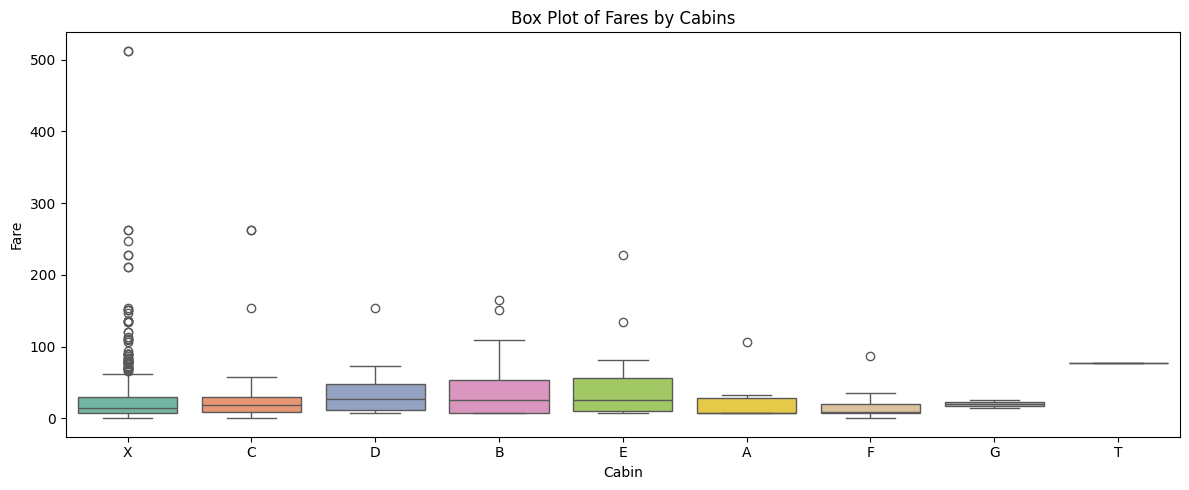

In [5]:
# Assign 'X' to missing cabin values, otherwise take the first letter of the cabin label
# This creates a simplified representation of the cabin based on its first character
train_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train_data['Cabin']])  # Process training data
test_data['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in test_data['Cabin']])    # Process testing data

# Create a boxplot to visualize the distribution of fares by cabin
plt.figure(figsize=(12, 5))  # Set the figure size
plt.title('Box Plot of Fares by Cabins')  # Add title to the plot
sns.boxplot(x='Cabin', y='Fare', data=train_data, palette='Set2')  # Boxplot showing fare distribution grouped by cabin
plt.tight_layout()  # Adjust layout for better spacing between elements


The average fare for passengers in the missing X cabin class is noticeably low, indicating that most individuals without an assigned cabin paid a lower fare. However, there are some outliers with significantly higher fares that we can address. A reasonable approach would be to reassign these outliers to cabin classes C or B, as these classes typically correspond to higher fares.

To implement this, we assume that passengers without an assigned cabin generally paid lower fares. Therefore, any passenger in class X with a relatively high fare will be considered an outlier and reassigned based on the mean fares of the other cabin classes. This allows us to handle the outliers in a logical and consistent way.

Mean Fare of Cabin B 38.75404375
Mean Fare of Cabin C 37.14226285714286
Mean Fare of Cabin D 39.347225
Mean Fare of Cabin E 42.33948095238095


<ipython-input-6-d37bed0ab7d3>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cabin = cabin_fare[0]  # Extract cabin label
<ipython-input-6-d37bed0ab7d3>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fare = cabin_fare[1]   # Extract fare value
<ipython-input-6-d37bed0ab7d3>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cabin = cabin_fare[0]  # Extract cabin label
<ipython-input-6-d37bed0ab7d3>:10: FutureWarning: Series.__ge

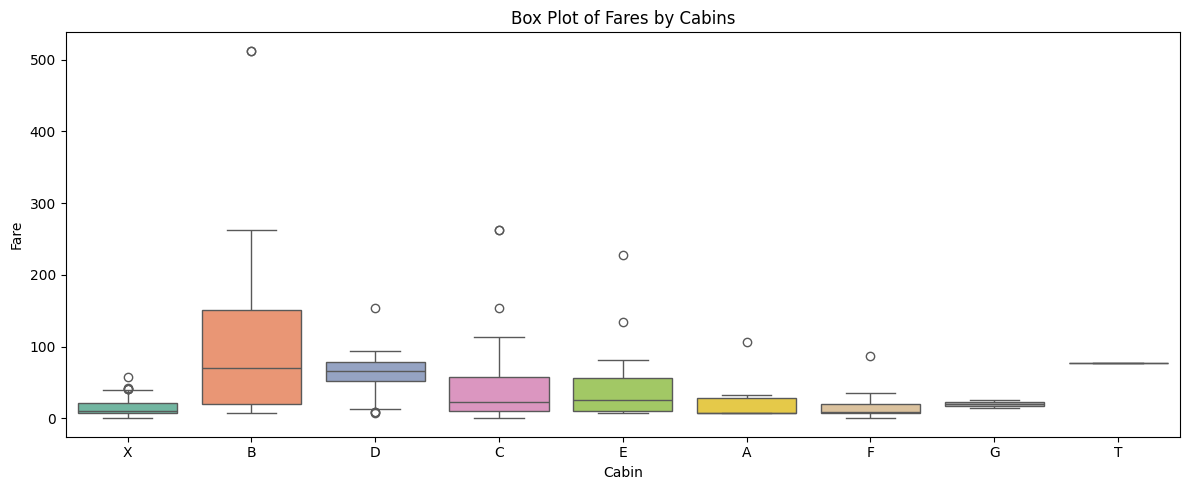

In [6]:
# Calculate and print the mean fare for passengers in each cabin
print('Mean Fare of Cabin B {}'.format(train_data[train_data['Cabin'] == 'B']['Fare'].mean()))  # Mean fare for Cabin B
print('Mean Fare of Cabin C {}'.format(train_data[train_data['Cabin'] == 'C']['Fare'].mean()))  # Mean fare for Cabin C
print('Mean Fare of Cabin D {}'.format(train_data[train_data['Cabin'] == 'D']['Fare'].mean()))  # Mean fare for Cabin D
print('Mean Fare of Cabin E {}'.format(train_data[train_data['Cabin'] == 'E']['Fare'].mean()))  # Mean fare for Cabin E

# Define a function to reassign cabin labels based on fare
def reasign_cabin(cabin_fare):
    cabin = cabin_fare[0]  # Extract cabin label
    fare = cabin_fare[1]   # Extract fare value

    # Reassign cabin if the current label is 'X' (unknown cabin)
    if cabin == 'X':
        # Assign 'B' for fares greater than or equal to 113.5
        if fare >= 113.5:
            return 'B'
        # Assign 'C' for fares between 100 and 113.5
        if 100 < fare < 113.5:
            return 'C'
        # Assign 'D' for fares between 57 and 100
        if 57 < fare < 100:
            return 'D'
        # Assign 'D' for fares between 46 and 57 (overlapping range, may need clarification)
        if 46 < fare < 57:
            return 'D'
        # Default to 'X' for all other cases
        else:
            return 'X'
    else:
        # If cabin is already known, retain the original cabin label
        return cabin

# Apply the cabin reassignment function to the training and testing datasets
train_data['Cabin'] = train_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)  # Update cabin labels in training data
test_data['Cabin'] = test_data[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)    # Update cabin labels in testing data

# Create a boxplot to visualize the distribution of fares by cabin
plt.figure(figsize=(12, 5))  # Set the figure size
plt.title('Box Plot of Fares by Cabins')  # Add title to the plot
sns.boxplot(x='Cabin', y='Fare', data=train_data, palette='Set2')  # Boxplot of fares grouped by cabin
plt.tight_layout()  # Adjust the layout for better spacing


### **Feature engineering**

Created new features in the Titanic dataset (Alone and Familiars) to analyze passengers' survival based on whether they were traveling alone or with family. It also visualizes survival trends using these features.

<ipython-input-7-35cb74cce3e5>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (SibSp_Parch[0] + SibSp_Parch[1]) == 0:
<ipython-input-7-35cb74cce3e5>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (SibSp_Parch[0] + SibSp_Parch[1]) == 0:


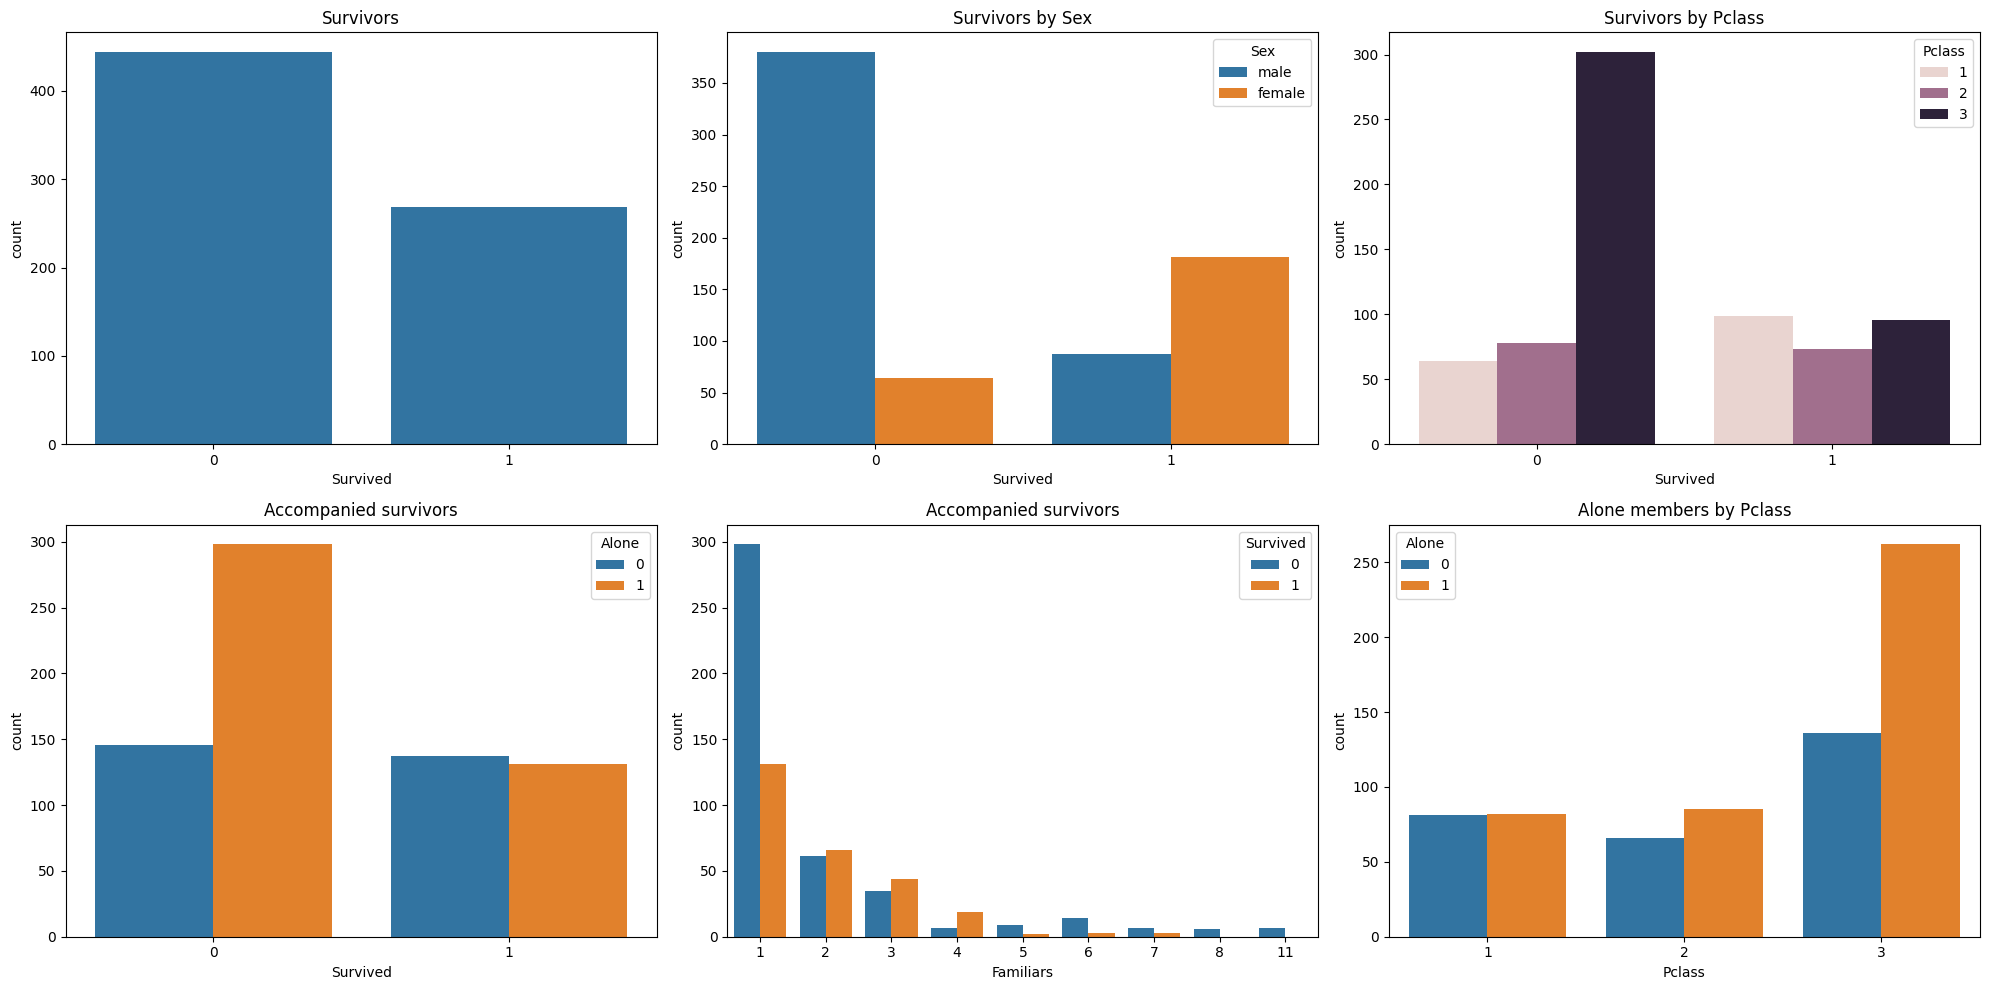

In [7]:
# Function to determine if a passenger is alone or not based on 'SibSp' (siblings/spouses) and 'Parch' (parents/children)
def create_alone_feature(SibSp_Parch):
    # If both 'SibSp' and 'Parch' are 0 (no family onboard), the passenger is alone
    if (SibSp_Parch[0] + SibSp_Parch[1]) == 0:
        return 1  # Alone
    else:
        return 0  # Not alone

# Apply the function to the training dataset to create a new 'Alone' column
train_data['Alone'] = train_data[['SibSp', 'Parch']].apply(create_alone_feature, axis=1)

# Create a new column 'Familiars' in the training data to represent the total number of family members onboard (including self)
train_data['Familiars'] = 1 + train_data['SibSp'] + train_data['Parch']

# Apply the same logic to the testing dataset
test_data['Alone'] = test_data[['SibSp', 'Parch']].apply(create_alone_feature, axis=1)
test_data['Familiars'] = 1 + test_data['SibSp'] + test_data['Parch']

# Create subplots to visualize relationships and survival statistics
fig, axx = plt.subplots(2, 3, figsize=(20, 10))  # 2 rows and 3 columns of plots

# Plot the count of survivors and non-survivors
axx[0, 0].set_title('Survivors')  # Title for the plot
sns.countplot(x='Survived', data=train_data, ax=axx[0, 0])  # Count plot for survival status

# Plot the count of survivors by gender
axx[0, 1].set_title('Survivors by Sex')  # Title for the plot
sns.countplot(x='Survived', hue='Sex', data=train_data, ax=axx[0, 1])  # Survival count by gender

# Plot the count of survivors by passenger class (Pclass)
axx[0, 2].set_title('Survivors by Pclass')  # Title for the plot
sns.countplot(x='Survived', hue='Pclass', data=train_data, ax=axx[0, 2])  # Survival count by passenger class

# Plot the count of survivors by whether they were alone
axx[1, 0].set_title('Accompanied survivors')  # Title for the plot
sns.countplot(x='Survived', hue='Alone', data=train_data, ax=axx[1, 0])  # Survival count by alone/accompanied status

# Plot the count of survivors by the number of familiars onboard
axx[1, 1].set_title('Accompanied survivors')  # Title for the plot
sns.countplot(x='Familiars', hue='Survived', data=train_data, ax=axx[1, 1])  # Survival count by number of familiars

# Plot the count of passengers who were alone by passenger class (Pclass)
axx[1, 2].set_title('Alone members by Pclass')  # Title for the plot
sns.countplot(x='Pclass', hue='Alone', data=train_data, ax=axx[1, 2])  # Alone status by passenger class

# Adjust subplot spacing for better layout
plt.tight_layout()


It’s evident that passengers who survived generally paid higher fares, as reflected in their fare distribution. Survivors also tended to be slightly younger than those who didn’t survive. Additionally, we observe that passengers in 1st class were older on average, while those in 3rd class were younger.

Next, examining the correlation between features reveals a notable relationship between Fare and Survived. However, since correlation does not account for categorical variables, it’s beneficial to map features like Sex and Embarked to numerical values for a more comprehensive analysis.

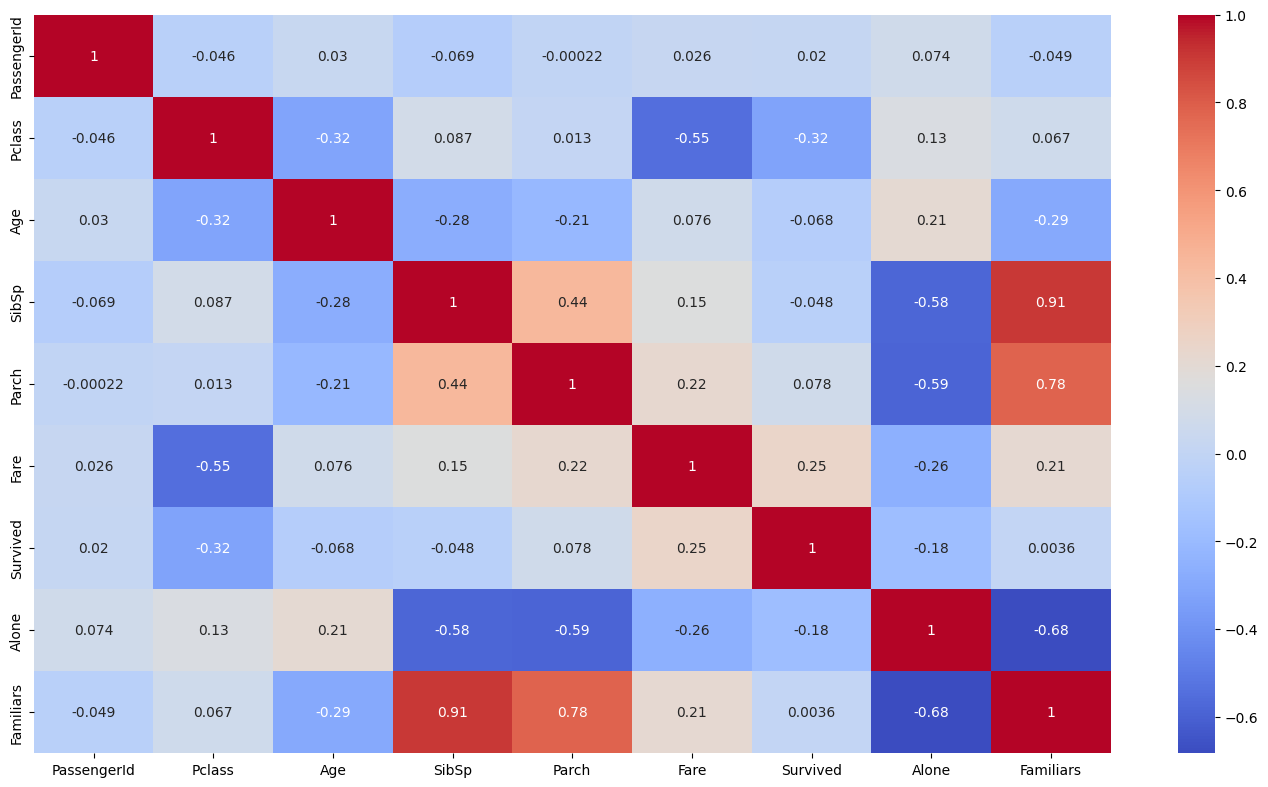

In [8]:
# Drop non-numeric columns before computing correlations
cols_to_exclude = ['Name', 'Ticket']  # Add other non-numeric columns if needed
numeric_cols = train_data.drop(columns=cols_to_exclude).select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [9]:
# dropping columns that are not important
train_data = train_data.drop(['Name','Ticket','PassengerId'], axis=1)
test_data = test_data.drop(['Name','Ticket','PassengerId'], axis=1)
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Alone,Familiars
331,1,male,45.5,0,0,28.5000,X,S,0,1,1
733,2,male,23.0,0,0,13.0000,NaN,S,0,1,1
382,3,male,32.0,0,0,7.9250,X,S,0,1,1
704,3,male,26.0,1,0,7.8542,X,S,0,0,2
813,3,female,6.0,4,2,31.2750,NaN,S,0,0,7


### **Normalize Data**

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Map 'Sex' to numerical values (already done, but added for clarity)
categories = {"female": 1, "male": 0}
train_data['Sex'] = train_data['Sex'].map(categories)
test_data['Sex'] = test_data['Sex'].map(categories)

# Map 'Embarked' to numerical values (ensure no NaNs)
categories = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(categories)
test_data['Embarked'] = test_data['Embarked'].map(categories)

# Fill missing 'Embarked' values in both train and test data if necessary
train_data['Embarked'].fillna(1, inplace=True)  # Fill with mode or appropriate value
test_data['Embarked'].fillna(1, inplace=True)

# Encode 'Cabin' column (already done, but verify it is numeric)
train_data['Cabin'] = train_data['Cabin'].astype("category").cat.codes
test_data['Cabin'] = test_data['Cabin'].astype("category").cat.codes

# Separate label (target variable 'Survived')
y_train = train_data['Survived']
y_test = test_data['Survived']

# Drop 'Survived' from the feature columns for scaling
X_train = train_data.drop(columns=['Survived'])
X_test = test_data.drop(columns=['Survived'])

# Ensure all categorical columns are encoded as numeric values before scaling
assert X_train.select_dtypes(include='object').empty, "There are still non-numeric columns in X_train!"
assert X_test.select_dtypes(include='object').empty, "There are still non-numeric columns in X_test!"

# Scale features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the training features
scaled_train = scaler.fit_transform(X_train)

# Transform the test features using the same scaler
scaled_test = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
scaled_train = pd.DataFrame(scaled_train, columns=X_train.columns, index=X_train.index)
scaled_test = pd.DataFrame(scaled_test, columns=X_test.columns, index=X_test.index)

# Display the scaled data
scaled_train.head()


<ipython-input-10-01c3c505894e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(1, inplace=True)  # Fill with mode or appropriate value
<ipython-input-10-01c3c505894e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
331,0.0,0.0,0.566474,0.000,0.000000,0.055628,1.0,0.0,1.0,0.0
733,0.5,0.0,0.283740,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0
382,1.0,0.0,0.396833,0.000,0.000000,0.015469,1.0,0.0,1.0,0.0
704,1.0,0.0,0.321438,0.125,0.000000,0.015330,1.0,0.0,0.0,0.1
813,1.0,1.0,0.070118,0.500,0.333333,0.061045,0.0,0.0,0.0,0.6


### **Random Forest Classifier**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]  # Address class imbalance if needed
}

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(scaled_train, y_train)

# Get the best parameters and fit the model with those parameters
best_clf = grid_search.best_estimator_

# Train the model using the best parameters found by GridSearchCV
best_clf.fit(scaled_train, y_train)

# Predict on the test set
y_pred = best_clf.predict(scaled_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Accuracy Score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Cross-validation score (to check generalization)
cv_scores = cross_val_score(best_clf, scaled_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
591 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


Confusion Matrix:
[[92 13]
 [20 54]]

Accuracy: 0.82
Cross-Validation Scores: [0.85314685 0.84615385 0.82394366 0.76760563 0.83098592]
Mean Cross-Validation Score: 0.82


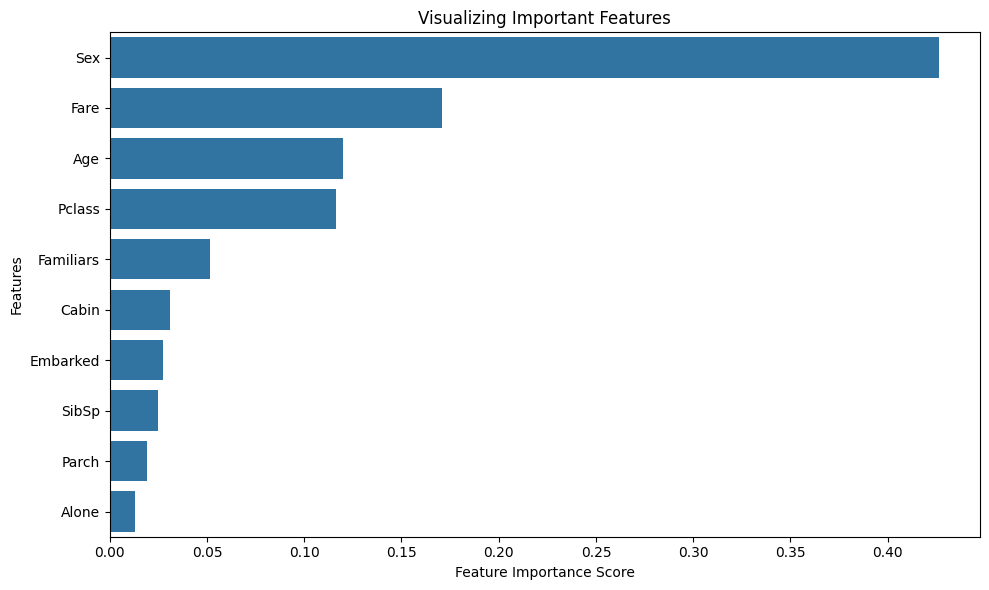

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure scaled_train is a DataFrame
# Get feature importances from the best model (best_clf)
feature_imp = pd.Series(best_clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

# Show the plot
plt.show()


### **Confusion Matrix**

In [14]:
from sklearn.metrics import confusion_matrix

# After making predictions
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[92 13]
 [20 54]]


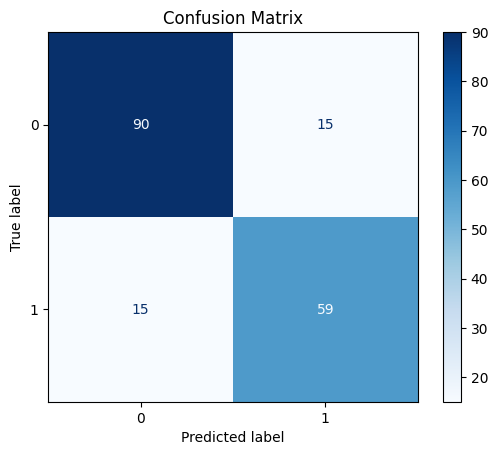

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(scaled_train, y_train)

# Predict on the test set
y_pred = clf.predict(scaled_test)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")  # Use 'Blues' for a visually appealing color map
plt.title("Confusion Matrix")
plt.show()

# Print the classification report for more details
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [28]:
import joblib
joblib.dump(clf,"random_forest.joblib")

['random_forest.joblib']

In [29]:
scaled_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
331,0.0,0.0,0.566474,0.000,0.000000,0.055628,1.0,0.0,1.0,0.0
733,0.5,0.0,0.283740,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0
382,1.0,0.0,0.396833,0.000,0.000000,0.015469,1.0,0.0,1.0,0.0
704,1.0,0.0,0.321438,0.125,0.000000,0.015330,1.0,0.0,0.0,0.1
813,1.0,1.0,0.070118,0.500,0.333333,0.061045,0.0,0.0,0.0,0.6
